# ImmoWeb Data Exploration
## Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
import numpy as np

## Create dataframe with cleaned datset

In [39]:
df = pd.read_csv('immo_cleaned_data.csv')
print(df.dtypes)

Id                     int64
Locality              object
Type                  object
SubType               object
Price                  int64
Bedrooms               int64
Living_Area            int64
Is_Equiped_Kitchen     int64
Is_Furnished           int64
Is_Open_Fire           int64
Terrace                int64
Terrace_Area           int64
Garden                 int64
Garden_Area            int64
Land_Surface           int64
State                 object
Facades                int64
Swim_pool              int64
dtype: object


## 1. How many rows and columns?

In [40]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 11301
Number of columns: 18


## 2. What is the correlation between the variables and the price? (Why might that be?)

## 3. How are variables correlated to each other? (Why?)

## 4. Which variables have the greatest influence on the price?

## 5. Which variables have the least influence on the price?

Is_Furnished
0    97.257581
1     2.742419
Name: proportion, dtype: float64


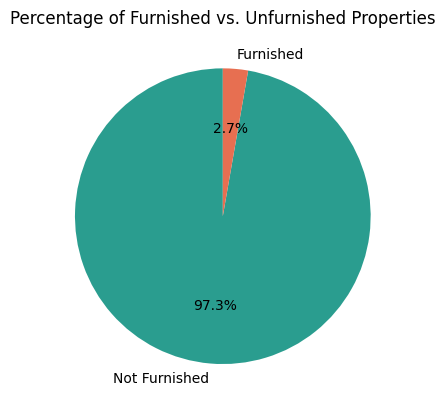

In [41]:
furnished_percentage = (df_map['Is_Furnished'].value_counts(normalize=True) * 100)
print(furnished_percentage)

labels = ['Not Furnished', 'Furnished']
colours = ['#2a9d8f', '#e76f51']

plt.pie(furnished_percentage, labels=labels, autopct='%1.1f%%', startangle=90, colors=colours)
plt.title('Percentage of Furnished vs. Unfurnished Properties')
plt.show()


## 6. How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

In [42]:
dtypes = df.dtypes

# qualitative (categorical) vs quantitative (numerical)
qualitative_vars = dtypes[dtypes == 'object'].index.tolist()
qualitative_vars += dtypes[dtypes == 'category'].index.tolist()
quantitative_vars = dtypes[(dtypes == 'int64') | (dtypes == 'float64')].index.tolist()

print(f"Number of Qualitative Variables: {len(qualitative_vars)}")
print(f"Number of Quantitative Variables: {len(quantitative_vars)}")

print("Qualitative Variables:", qualitative_vars)
print("Quantitative Variables:", quantitative_vars)


Number of Qualitative Variables: 4
Number of Quantitative Variables: 14
Qualitative Variables: ['Locality', 'Type', 'SubType', 'State']
Quantitative Variables: ['Id', 'Price', 'Bedrooms', 'Living_Area', 'Is_Equiped_Kitchen', 'Is_Furnished', 'Is_Open_Fire', 'Terrace', 'Terrace_Area', 'Garden', 'Garden_Area', 'Land_Surface', 'Facades', 'Swim_pool']


## 7. Percentage of missing values per column?

In [43]:
#Already dealt with missing values via imputation.

missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)


Id                    0.0
Locality              0.0
Type                  0.0
SubType               0.0
Price                 0.0
Bedrooms              0.0
Living_Area           0.0
Is_Equiped_Kitchen    0.0
Is_Furnished          0.0
Is_Open_Fire          0.0
Terrace               0.0
Terrace_Area          0.0
Garden                0.0
Garden_Area           0.0
Land_Surface          0.0
State                 0.0
Facades               0.0
Swim_pool             0.0
dtype: float64


# Must Answer
- Plot the outliers.
- Which variables would you delete and why ?
- Represent the number of properties according to their surface using a histogram.
- In your opinion, which 5 variables are the most important and why?
- What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)
- What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)
- What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)
- What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)
- What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)
- What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)

## Plot the outliers

### Land_Surface

In [44]:
#IQR method

Q1 = df['Land_Surface'].quantile(0.25)
Q3 = df['Land_Surface'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Land_Surface'] < lower_bound) | (df['Land_Surface'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

#print(outliers)

# Exclude outliers
df = df[(df['Land_Surface'] >= lower_bound) & (df['Land_Surface'] <= upper_bound)]


Number of outliers: 1203


## Which variables would you delete and why ?

- Sale_Type: Only value is "Private" - not meaningful.
- Surface of the plot: Over 50% empty values. Some values are smaller than Land_Surface. Suspect this got switched with Land_Surface during scraping phase of the project. 
- Removed category "Other" from "Type": Only interested in houses and apartments - not garages, covered parking, offices, etc.

## Represent the number of properties according to their surface using a histogram.

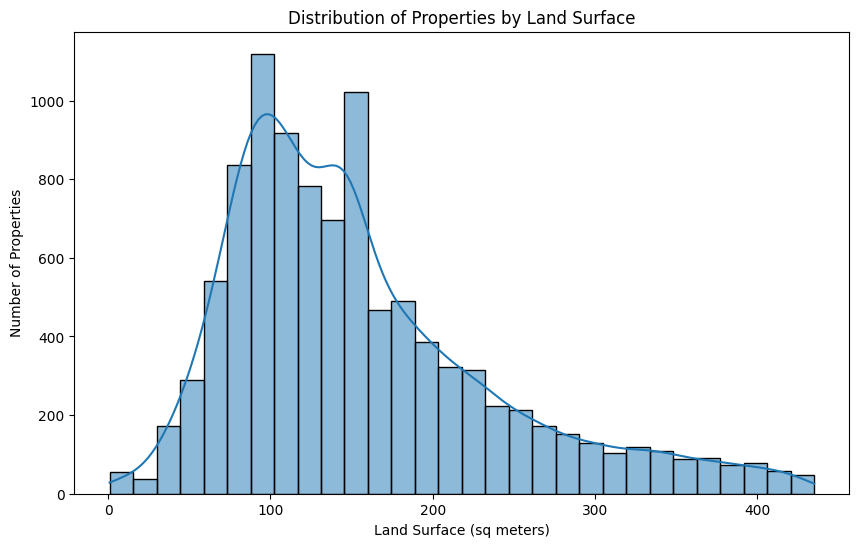

In [45]:
# KDE plot overlyed on histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Land_Surface'], bins=30, kde=True, edgecolor='black')
plt.title('Distribution of Properties by Land Surface')
plt.xlabel('Land Surface (sq meters)')
plt.ylabel('Number of Properties')
plt.show()

Most properties are around 100 m²

## - In your opinion, which 5 variables are the most important and why?

1. Price:
- Crucial for all analysis
- Relationship between price and other variables are of main interest.

2. Locality:
- Location can significantly affect price.

3. Living_Area and/or Land_Surface:
- Size of the building and total plot can also affect price.

4. Type:
- Houses are usually more expensive than apartments.

5. State:
- if price is very low but house needs renovation, this could indicate a higher investment after the initial purchase.

## What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)


## Heatmap of Belgium
### Distribution of properties according to price

In [46]:
# File with geo data
df_map = pd.read_csv("Geo_Data.csv")

#extract latitude (X), longitude (Y) and price
heat_data = [
    [row['X'], row['Y'], row['Price']] for i, row in df_map.iterrows() if row['Price'] > 0
]

# base map centered on Belgium
map_belgium = folium.Map(location=[50.8503, 4.3517], zoom_start=8)

# Layer heatmap over basemap
HeatMap(heat_data, radius=10, max_zoom=13).add_to(map_belgium)

# Save as html file (interactive)
map_belgium.save('belgium_property_heatmap.html')

## Value for money index